In [2]:
import os
import pandas as pd
import json
import urllib.request
import urllib.parse
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import imghdr
from PIL import Image
from random import randint
import tensorflow as tf
%matplotlib inline

c:\users\ranu\desktop\projects\datascience\envlat\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [43]:
import time

In [3]:
BASE_DIR='C:\\Users\\ranu\\Desktop\\projects\\kaggle'
DATA_DIR=os.path.join(BASE_DIR, 'kaggle-data')

COMPETITION_NAME = 'imaterialist-challenge-furniture-2018'
COMP_DATA_DIR=os.path.join(DATA_DIR, COMPETITION_NAME)

COMPETITION_DATA = 'competition-files'
COMPETITION_FILE_LIST = 'cfiles.csv'
TEST_DATA = 'test'
TRAIN_DATA = 'train'
VAL_DATA = 'validation'
IMAGE_PATH = "imgfiles"
LABEL_FILE = 'lables.csv'

TRAIN_IMAGE_PATH=os.path.join(DATA_DIR, COMPETITION_NAME, TRAIN_DATA, IMAGE_PATH)
TEST_IMAGE_PATH=os.path.join(DATA_DIR, COMPETITION_NAME, TEST_DATA, IMAGE_PATH)
VAL_IMAGE_PATH=os.path.join(DATA_DIR, COMPETITION_NAME, VAL_DATA, IMAGE_PATH)
TRAIN_LABEL_PATH=os.path.join(DATA_DIR, COMPETITION_NAME, TRAIN_DATA, LABEL_FILE)
TEST_LABEL_PATH=os.path.join(DATA_DIR, COMPETITION_NAME, TEST_DATA, LABEL_FILE)
VAL_LABEL_PATH=os.path.join(DATA_DIR, COMPETITION_NAME, VAL_DATA, LABEL_FILE)

In [55]:
#image handling
def ShowImageInfo(path, imgid):
    image_location = os.path.join(path, str(imgid))
    print("File location : ", image_location)
    print("File type : ", imghdr.what(image_location))
    img=mpimg.imread(image_location)
    print("Image shape : ", img.shape)
    plt.imshow(img)
    
def GetAverageXY(path, maxdata, samplesz, display=True):
    X = 0
    Y = 0
    act_samples = 0
    index_error = []
    os_error = []
    notfound = []
    diffshape = []
    imgheaders = {}
    nonehdr = []
    for i in range(1, samplesz):
        randsample = randint(1, maxdata-1)
        try:
            image_location = os.path.join(path, str(randsample))
            img=mpimg.imread(image_location)
            img_hdr = imghdr.what(image_location)
            if img_hdr in imgheaders.keys():
                imgheaders[img_hdr] = imgheaders[img_hdr] + 1
            else:
                imgheaders[img_hdr] = 1
            if img_hdr is None:
                nonehdr.append(randsample)
            sp = img.shape
            X += sp[0]
            Y += sp[1]
            if sp[2] != 3:
                if display:
                    print("Image shape is different : ", randsample, img.shape)
                diffshape.append(randsample)
            act_samples = act_samples + 1
        except FileNotFoundError:
            if display:
                print("Not Found : ", randsample)
            notfound.append(randsample)
        except OSError:
            if display:
                print("OSError : ", randsample)
            os_error.append(randsample)
        except IndexError:
            index_error.append(randsample)
            if display:
                print("IndexError : ", randsample, img.shape)
            
    return X//act_samples, Y//act_samples, index_error, os_error, notfound, diffshape, imgheaders, nonehdr

def ImageResize(path, imgid, size_tuple):
    image_path=os.path.join(path, str(imgid))
    ext = imghdr.what(image_path)
    img=Image.open(image_path)
    #img.thumbnail(size_tuple, Image.ANTIALIAS) <-- inplace
    out_img = img.resize(size_tuple)
    if ext is not None:
        out_fname = "test" + "." + ext
    else:
        out_fname = "test" + ".bmp"
    out_img.save(out_fname)
    return mpimg.imread(out_fname)


def anygeResize(path, imgid, size_tuple):
    image_path=os.path.join(path, str(imgid))
    #ext = imghdr.what(image_path)
    img=Image.open(image_path)
    #img.thumbnail(size_tuple, Image.ANTIALIAS) <-- inplace
    out_img = img.resize(size_tuple)
    return np.array(out_img)

In [5]:
train_label_df = pd.read_csv(TRAIN_LABEL_PATH)
print(train_label_df.head())

val_label_df = pd.read_csv(VAL_LABEL_PATH)
print(val_label_df.head())

   id  predicted
0   1          5
1   2          5
2   3          5
3   4          5
4   5          5
   id  predicted
0   1         38
1   2         63
2   3         33
3   4        126
4   5         18


File location :  C:\Users\ranu\Desktop\projects\kaggle\kaggle-data\imaterialist-challenge-furniture-2018\train\imgfiles\50260
File type :  png
Image shape :  (800, 800, 4)


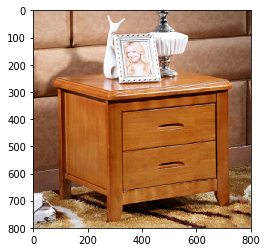

In [6]:
ShowImageInfo(TRAIN_IMAGE_PATH, 50260)

In [9]:
GetAverageXY(TRAIN_IMAGE_PATH, len(train_label_df), 10000)

Not Found :  96553
Image shape is different :  29539 (465, 412, 4)
Not Found :  25058
Not Found :  91992
Image shape is different :  86801 (360, 640, 4)
Not Found :  139148
Not Found :  36462
Not Found :  94770
Not Found :  138576
Not Found :  96624
IndexError :  86405 (682, 1023)
Not Found :  191824
Not Found :  137470
Not Found :  95201
Not Found :  92705
Not Found :  122776
Not Found :  13964
Not Found :  93250
Not Found :  137534
Not Found :  121389
Not Found :  45346
Not Found :  121776
Not Found :  96471
Not Found :  93667
Image shape is different :  65320 (435, 422, 4)
Not Found :  94520
Image shape is different :  99458 (800, 800, 4)
Not Found :  151854
Not Found :  136166
Not Found :  117634
Not Found :  125841
Not Found :  8916
Not Found :  81801
Not Found :  138351
Not Found :  138246
Not Found :  96104
Not Found :  122825
Not Found :  174872
Not Found :  138134
Not Found :  122870
Not Found :  95389
Image shape is different :  172745 (480, 374, 4)
Not Found :  15290
Not Fou

c:\users\ranu\desktop\projects\datascience\envlat\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 19660800 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
c:\users\ranu\desktop\projects\datascience\envlat\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1000000 bytes but only got 0. Skipping tag 59464
  " Skipping tag %s" % (size, len(data), tag))
c:\users\ranu\desktop\projects\datascience\envlat\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 18481152 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
c:\users\ranu\desktop\projects\datascience\envlat\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 37093376 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
c

Image shape is different :  62288 (703, 750, 4)
Not Found :  139589
Not Found :  116946
Not Found :  12098
Image shape is different :  36421 (800, 800, 4)
Not Found :  173092
Not Found :  23135
Image shape is different :  58689 (800, 800, 4)
Not Found :  66334
Image shape is different :  78038 (682, 1024, 4)
Image shape is different :  28578 (750, 750, 4)
Not Found :  97376
Not Found :  139253
Not Found :  5152
Not Found :  122477
Not Found :  125630
Not Found :  56584
Not Found :  115430
Not Found :  92834
Not Found :  96935
Not Found :  121790
Not Found :  95485
Not Found :  125841
Image shape is different :  190273 (600, 600, 4)
Not Found :  94490
Not Found :  94545
Not Found :  137504
Not Found :  42850
Not Found :  121227
Not Found :  91756
Not Found :  95398
Not Found :  122868
Not Found :  94345
IndexError :  149701 (961, 1280)
Not Found :  81003
Not Found :  96768
Not Found :  137019
Not Found :  95745
Not Found :  137516
Not Found :  34520
Not Found :  96543
Not Found :  93119

Not Found :  137337
Not Found :  94831
Not Found :  136204
Not Found :  25333
Image shape is different :  193543 (500, 500, 4)
OSError :  91240
Not Found :  121327
Not Found :  138014
Not Found :  185554
Not Found :  95557
Not Found :  142455
Not Found :  92159
Not Found :  139554
Not Found :  136222
Not Found :  96177
Not Found :  136188
Image shape is different :  80131 (640, 640, 4)
Image shape is different :  98730 (435, 549, 4)
Not Found :  132207
Not Found :  96190
Not Found :  25303
Not Found :  93633
Image shape is different :  135562 (778, 793, 4)
IndexError :  124083 (800, 800)
Not Found :  137715
Not Found :  138924
Image shape is different :  155199 (462, 571, 4)
Not Found :  143636
Not Found :  84675
Not Found :  112643
Not Found :  93654
Not Found :  125848
Not Found :  94560
Not Found :  121294
Not Found :  83480
Image shape is different :  176856 (586, 750, 4)
Not Found :  55738
Not Found :  122805
Image shape is different :  14511 (800, 800, 4)
Not Found :  138804
OSEr

Not Found :  95134
Not Found :  137425
Not Found :  125591
Not Found :  137316
Not Found :  148669
Image shape is different :  48631 (800, 800, 4)
Not Found :  95742
Image shape is different :  67854 (366, 368, 4)
Not Found :  95597
Not Found :  25055
Image shape is different :  58760 (290, 500, 4)
Not Found :  139754
Image shape is different :  22529 (485, 650, 4)
Not Found :  138580
Not Found :  61397
Not Found :  24690
Not Found :  33850
Not Found :  136139
Not Found :  95723
Not Found :  19874
Image shape is different :  61542 (300, 300, 4)
Image shape is different :  152448 (397, 402, 4)
Image shape is different :  31090 (1600, 1600, 4)
Not Found :  139276
Image shape is different :  143747 (917, 790, 4)
Image shape is different :  150727 (800, 800, 4)
Not Found :  123210
Image shape is different :  41203 (400, 600, 4)
Image shape is different :  114402 (356, 553, 4)
Not Found :  145330
Not Found :  96039
Not Found :  137433
Not Found :  132472
Not Found :  136458
Not Found :  139

KeyboardInterrupt: 

In [48]:
xavg, yavg, indexerr, oserror, notfound, diffshape, imgheaders, nonehdr = GetAverageXY(TRAIN_IMAGE_PATH, len(train_label_df), 1000)

Not Found :  116282
Not Found :  146506
Not Found :  137610
Not Found :  137465
Not Found :  121683
Not Found :  138655
Not Found :  92379
Not Found :  25224
Not Found :  123701
Not Found :  97889
Image shape is different :  156103 (800, 800, 4)
Not Found :  95728
Not Found :  101438
Image shape is different :  176003 (500, 500, 4)
Not Found :  179294
Not Found :  97664
Not Found :  95545
Not Found :  193426
Not Found :  95010
Not Found :  125833
Not Found :  92987
Not Found :  188558
Not Found :  92571
Not Found :  137440
Not Found :  24746
Not Found :  139581
Image shape is different :  23802 (400, 400, 4)
Not Found :  56168
Not Found :  97701
Not Found :  95141
Image shape is different :  46768 (300, 380, 4)
Not Found :  93816
Not Found :  4107
Not Found :  139658
Not Found :  138848
Not Found :  97107
Image shape is different :  159934 (963, 750, 4)
Not Found :  95165
Image shape is different :  59640 (800, 800, 4)
Not Found :  139547
Not Found :  121187
OSError :  142443
Not Found

In [49]:
print(xavg, yavg, len(indexerr), len(oserror), len(notfound), len(diffshape), len(nonehdr))
print(imgheaders)

727 765 0 2 100 18 116
{'jpeg': 743, None: 116, 'png': 29, 'webp': 2, 'gif': 7}


In [51]:
nonehdr

[164081,
 66219,
 59914,
 73034,
 163774,
 55114,
 117133,
 186032,
 21170,
 72097,
 38831,
 41611,
 102078,
 50551,
 76298,
 130008,
 86866,
 123718,
 169627,
 21825,
 139938,
 193974,
 587,
 168744,
 158731,
 68844,
 11486,
 73319,
 90752,
 117076,
 62057,
 165789,
 187038,
 140574,
 23185,
 118462,
 193812,
 177854,
 50046,
 46151,
 97941,
 159471,
 2358,
 64604,
 71947,
 18502,
 162559,
 115736,
 82449,
 67397,
 31855,
 84070,
 156442,
 17363,
 108191,
 190328,
 158378,
 91507,
 20723,
 7517,
 8266,
 135478,
 194370,
 84019,
 35414,
 50074,
 162186,
 125193,
 55737,
 170317,
 164721,
 193352,
 24630,
 167094,
 98821,
 161545,
 105195,
 127380,
 173681,
 36360,
 37021,
 140996,
 105742,
 120814,
 48970,
 15667,
 134797,
 180469,
 139916,
 35639,
 63666,
 119463,
 162123,
 141415,
 111458,
 12875,
 186245,
 79628,
 38735,
 76410,
 25533,
 12705,
 31183,
 37786,
 22723,
 150692,
 23635,
 1849,
 47893,
 160827,
 19779,
 72088,
 79237,
 120768,
 11489,
 52499]

File location :  C:\Users\ranu\Desktop\projects\kaggle\kaggle-data\imaterialist-challenge-furniture-2018\train\imgfiles\156103
File type :  png
Image shape :  (800, 800, 4)
File location :  C:\Users\ranu\Desktop\projects\kaggle\kaggle-data\imaterialist-challenge-furniture-2018\train\imgfiles\176003
File type :  webp
Image shape :  (500, 500, 4)
File location :  C:\Users\ranu\Desktop\projects\kaggle\kaggle-data\imaterialist-challenge-furniture-2018\train\imgfiles\23802
File type :  webp
Image shape :  (400, 400, 4)
File location :  C:\Users\ranu\Desktop\projects\kaggle\kaggle-data\imaterialist-challenge-furniture-2018\train\imgfiles\46768
File type :  png
Image shape :  (300, 380, 4)
File location :  C:\Users\ranu\Desktop\projects\kaggle\kaggle-data\imaterialist-challenge-furniture-2018\train\imgfiles\159934
File type :  gif
Image shape :  (963, 750, 4)
File location :  C:\Users\ranu\Desktop\projects\kaggle\kaggle-data\imaterialist-challenge-furniture-2018\train\imgfiles\59640
File type

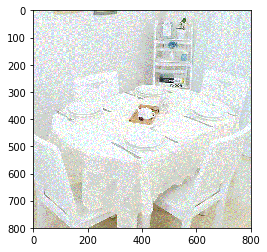

In [107]:
for i in range(len(diffshape)):
    ShowImageInfo(TRAIN_IMAGE_PATH, diffshape[i])

In [58]:
indexerr

[]

In [61]:
len (new_size)

2

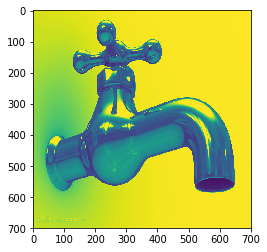

In [105]:
imgae_id = 149701
new_size = (700, 700)
img_rsz = ImageResize(TRAIN_IMAGE_PATH, imgae_id, new_size)
plt.imshow(img_rsz)

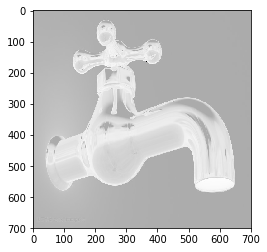

In [106]:
img_zeros = np.zeros((700, 700, 3))
img_zeros[:,:,0] = img_rsz//3
img_zeros[:,:,1] = img_rsz//3
img_zeros[:,:,2] = img_rsz//3
plt.imshow(img_zeros)

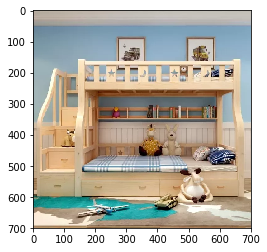

In [108]:
diffshape_img_id = 23802
ds_new_size = (700, 700)
ds_img_rsz = ImageResize(TRAIN_IMAGE_PATH, diffshape_img_id, ds_new_size)
plt.imshow(ds_img_rsz)

In [109]:
ds_img_rsz.shape

(700, 700, 4)

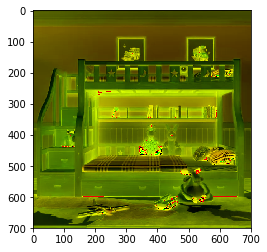

In [114]:
ds_img_zeros = np.zeros((700, 700, 3))
ds_img_zeros[:,:,0] = ds_img_rsz[:,:,1]
ds_img_zeros[:,:,1] = ds_img_rsz[:,:,2]
ds_img_zeros[:,:,2] = ds_img_rsz[:,:,3]
plt.imshow(ds_img_zeros)

In [123]:
ds_im = Image.open(os.path.join(TRAIN_IMAGE_PATH, str(164081)))
rgb_im = ds_im.convert('RGB')
#rgb_im.save('temp.jpeg')

Image shape :  (800, 800, 3)


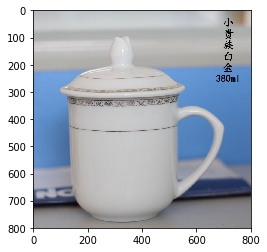

In [124]:
#ds_image_location = os.path.join('temp.jpeg')
#print("File type : ", imghdr.what(ds_image_location))
img=np.array(rgb_im)#=mpimg.imread(ds_image_location)
print("Image shape : ", img.shape)
plt.imshow(img)

File location :  C:\Users\ranu\Desktop\projects\kaggle\kaggle-data\imaterialist-challenge-furniture-2018\train\imgfiles\30
File type :  jpeg
Image shape :  (556, 609, 3)


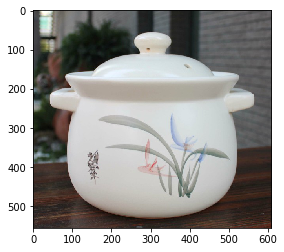

In [18]:

ShowImageInfo(TRAIN_IMAGE_PATH, imgae_id)
img_rsz = ImageResize(TRAIN_IMAGE_PATH, imgae_id, new_size)

(700, 700, 3)


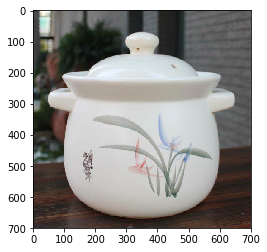

In [19]:
print(img_rsz.shape)
plt.imshow(img_rsz)

In [16]:
print("# of samples in train dataset : ", len(train_label_df))
print("# of samples in validation dataset : ", len(val_label_df))

# of samples in train dataset :  194828
# of samples in validation dataset :  6400


In [ ]:
data_path = "C:\\Users\\ranu\\Desktop\\projects\\kaggle\\kaggle-data\\imaterialist-challenge-furniture-2018\\competition-files"
print(os.listdir(data_path))
val_json = None
test_json = None
with open(os.path.join(data_path, 'validation.json')) as fp:
    val_json = json.loads(fp.read())
with open(os.path.join(data_path, 'test.json')) as fp:
    test_json = json.loads(fp.read())
print(len(val_json['annotations']))
print(len(val_json['images']))
print(len(test_json['images']))
val_json['annotations'][0]
print(val_json['annotations'][0]['image_id'])
print(val_json['annotations'][0]['label_id'])
val_json['images'][0]
print(val_json['images'][0]['image_id'])
print(val_json['images'][0]['url'][0])
test_json['images'][0]

In [28]:
testurl = 'http://www.56de.com/img/i3/1028187081/TB2Hu3qamKI.eBjy1zcXXXIOpXa_!!1028187081.jpg'

urllib.request.urlretrieve(testurl, "C:\\Users\\ranu\\Desktop\\test.jpg")

('C:\\Users\\ranu\\Desktop\\test.jpg',
 <http.client.HTTPMessage at 0x2bf1af2d0f0>)

In [18]:
a = {}
a["b"] = 0
if "b" in a.keys():
    print('yesy')

yesy


In [125]:
bb = [(1,2), (3,5), (2, 5)]

In [127]:
cc = sorted(bb, key=lambda x: x[0])

In [128]:
cc

[(1, 2), (2, 5), (3, 5)]

In [130]:
for i in range(1):
    print(i)

0


In [142]:
t = tf.constant([[[1, 1, 1], [2, 2, 2]],
                 [[3, 3, 3], [4, 4, 4]],
                 [[5, 5, 5], [6, 6, 6]]])
t2 = tf.slice(t, [1, 0, 0], [1, 1, 3])  # [[[3, 3, 3]]]
t5 = tf.shape(t)

t3 = tf.slice(t, [1, 0, 0], [1, 2, 3])  # [[[3, 3, 3],
                                   #   [4, 4, 4]]]
t4 = tf.slice(t, [1, 0, 0], [2, 1, 3])  # [[[3, 3, 3]],
                                   #  [[5, 5, 5]]]
    
sess = tf.Session()
print(sess.run(t5))
sess.close()

[3 2 3]


In [188]:
t = tf.ones((3,3,3,3))

In [189]:
t32 = tf.range(32*32*3*8)
t64 = tf.reshape(t32, [32,32,3,8])

In [201]:
t128 = tf.unstack(t64, axis=3)[0]
t256 = tf.shape(t128)

In [203]:
sess = tf.Session()
print(sess.run(t256))
sess.close()

[32 32  3]


In [208]:
tx = tf.range(2*8*8)
ty = tf.reshape(tx, (2,8,8,1))
sess = tf.Session()
print(sess.run(ty))
sess.close()

[[[[  0]
   [  1]
   [  2]
   [  3]
   [  4]
   [  5]
   [  6]
   [  7]]

  [[  8]
   [  9]
   [ 10]
   [ 11]
   [ 12]
   [ 13]
   [ 14]
   [ 15]]

  [[ 16]
   [ 17]
   [ 18]
   [ 19]
   [ 20]
   [ 21]
   [ 22]
   [ 23]]

  [[ 24]
   [ 25]
   [ 26]
   [ 27]
   [ 28]
   [ 29]
   [ 30]
   [ 31]]

  [[ 32]
   [ 33]
   [ 34]
   [ 35]
   [ 36]
   [ 37]
   [ 38]
   [ 39]]

  [[ 40]
   [ 41]
   [ 42]
   [ 43]
   [ 44]
   [ 45]
   [ 46]
   [ 47]]

  [[ 48]
   [ 49]
   [ 50]
   [ 51]
   [ 52]
   [ 53]
   [ 54]
   [ 55]]

  [[ 56]
   [ 57]
   [ 58]
   [ 59]
   [ 60]
   [ 61]
   [ 62]
   [ 63]]]


 [[[ 64]
   [ 65]
   [ 66]
   [ 67]
   [ 68]
   [ 69]
   [ 70]
   [ 71]]

  [[ 72]
   [ 73]
   [ 74]
   [ 75]
   [ 76]
   [ 77]
   [ 78]
   [ 79]]

  [[ 80]
   [ 81]
   [ 82]
   [ 83]
   [ 84]
   [ 85]
   [ 86]
   [ 87]]

  [[ 88]
   [ 89]
   [ 90]
   [ 91]
   [ 92]
   [ 93]
   [ 94]
   [ 95]]

  [[ 96]
   [ 97]
   [ 98]
   [ 99]
   [100]
   [101]
   [102]
   [103]]

  [[104]
   [105]
   [106]
   [107]


In [212]:
def factorize(val):
    return [(i, val // i) for i in range(1, int(val**0.5)+1) if val % i == 0]

In [217]:
factorize(32)[-1]

(4, 8)